<a href="https://colab.research.google.com/github/edufrantzk/Varia-o-Mensal-CDI-e-IPCA-2019-a-2022/blob/main/Dados_Banco_Central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dados Banco Central do Brasil

In [ ]:
!pip install pandas_datareader

In [ ]:
#Fonte de dados: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries

#Endereço padrao: https://dadosabertos.bcb.gov.br/dataset/20542-saldo-da-carteira-de-credito-com-recursos-livres---total/resource/6e2b0c97-afab-4790-b8aa-b9542923cf88

import pandas as pd
import matplotlib.pyplot as plt


import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

In [ ]:
#consultando dados pelo seu código no site do bcb

def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [ ]:
#Consulta variação % mensal do IPCA

ipca = consulta_bc(433) 
ipca.head()



,valor
data,
1980-01-01,6.62
1980-02-01,4.62
1980-03-01,6.04
1980-04-01,5.29
1980-05-01,5.70


In [287]:
#Filtrando dados a partir de 01-01-2017

ipca[ipca.index >='2019-01-01'] 

,valor
data,
2019-01-01,0.32
2019-02-01,0.43
2019-03-01,0.75
2019-04-01,0.57
2019-05-01,0.13
2019-06-01,0.01
2019-07-01,0.19
2019-08-01,0.11
2019-09-01,-0.04


In [289]:
ipca3anos= ipca[ipca.index >='2019-01-01'] 
print(ipca3anos)

            valor
data             
2019-01-01   0.32
2019-02-01   0.43
2019-03-01   0.75
2019-04-01   0.57
2019-05-01   0.13
2019-06-01   0.01
2019-07-01   0.19
2019-08-01   0.11
2019-09-01  -0.04
2019-10-01   0.10
2019-11-01   0.51
2019-12-01   1.15
2020-01-01   0.21
2020-02-01   0.25
2020-03-01   0.07
2020-04-01  -0.31
2020-05-01  -0.38
2020-06-01   0.26
2020-07-01   0.36
2020-08-01   0.24
2020-09-01   0.64
2020-10-01   0.86
2020-11-01   0.89
2020-12-01   1.35
2021-01-01   0.25
2021-02-01   0.86
2021-03-01   0.93
2021-04-01   0.31
2021-05-01   0.83
2021-06-01   0.53
2021-07-01   0.96
2021-08-01   0.87
2021-09-01   1.16
2021-10-01   1.25
2021-11-01   0.95
2021-12-01   0.73
2022-01-01   0.54
2022-02-01   1.01


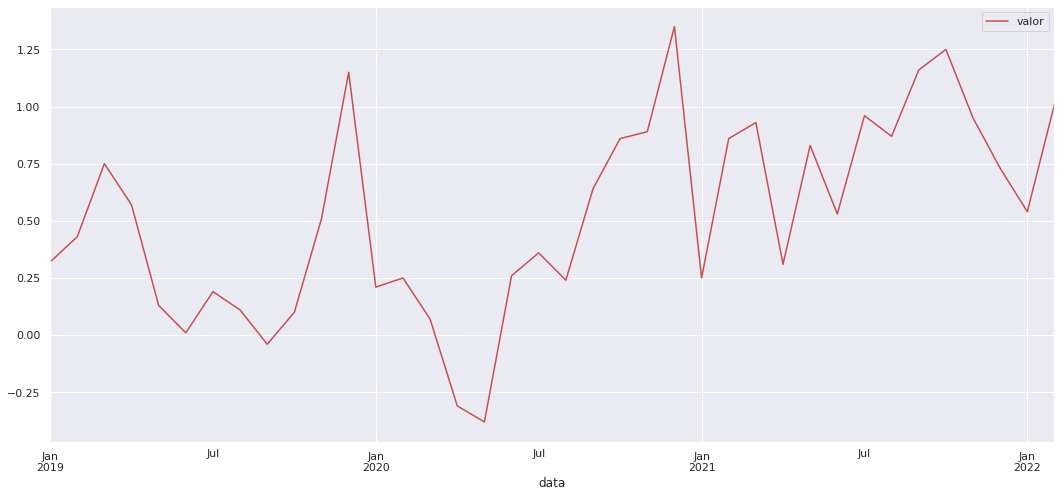

In [290]:
#Plotando o gráfico com o matplotlib
#https://matplotlib.org/

ipca3anos.plot(color = 'r', figsize=(18,8)) 

In [296]:
#Consulta variação % mensal do CDI

cdi = consulta_bc(4391)
cdi[cdi.index >= '2019-01-01']
cdi3anos=cdi[cdi.index >= '2019-01-01']

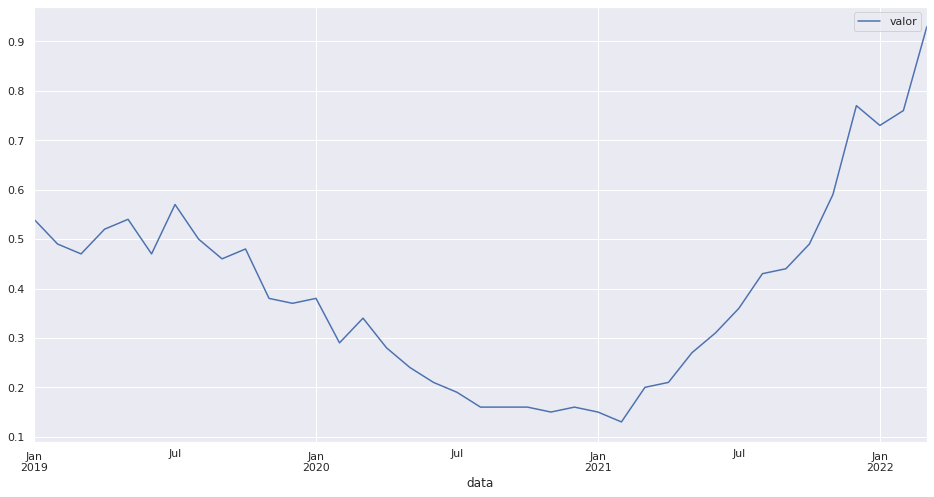

In [297]:
cdi3anos.plot(color = 'b')

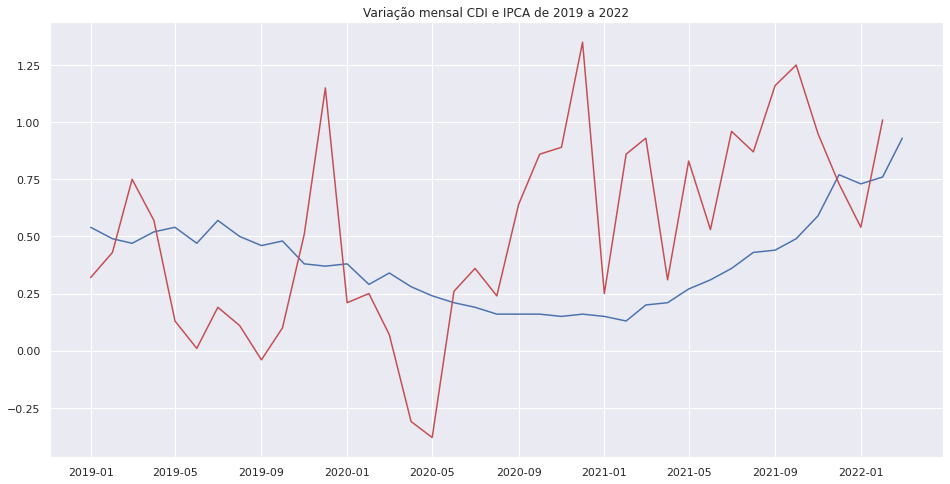

In [299]:
#Plotando os dois gráficos juntos

fig, ax = plt.subplots()
plt.title('Variação mensal CDI e IPCA de 2019 a 2022')
ax.plot(cdi3anos, color = 'b')
ax.plot(ipca3anos, color = 'r');